# Data 422

Data Wrangling, S2 2020

## Assignement 2

### 20% of final grade

## Due date: 2pm Tuesday 6 October 2020

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 25 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments equal to better marks.  
You can either modify this notebook or write a new one from scratch.

## Comment, explain, present your work in a clear way (1 mark)

## R part (overall 19 marks)

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.



I am interested in the below website page, where contains the scripts of one papular English drama named the Vampires' Diaries. I am going to extract all scripts of each episodes from the web and analyze them by applying nrc Word_emotion Association Lexicon. In the word list, it provides 8 basic emotions and 2 sentiments(negative and positive). 
Website url: https://subslikescript.com/series/The_Vampire_Diaries-1405406.

1. I call these packages for later steps: 

In [10]:
library(tidyverse)
library(magrittr) 
library(purrr) 
library(glue)
library(stringr)
library(rvest) 
library(polite)


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:purrr’:

    set_names




2. input the url, and read its html, and this is the base url and I start scraping from here. 

In [15]:
url_vampire_diaries <- "https://subslikescript.com/series/The_Vampire_Diaries-1405406" 

main_page <- read_html(url_vampire_diaries)

3. We can see the structure of this html. It contains head, body, div, etc.

In [16]:
main_page

{html_document}
<html lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n\t<div class="page-wrapper"> \n\t\t<header><div id="logo">\n\t\t\ ...

3. This step is to find where the links' tag are sitting. I found it is sitting in <a, <li, <ul, <div class="season". So I use html_nodes() function to dig into the tag where the href is sitting and use html_attrs() and map_chr to extract all "href". Here I get all the "href" for the links of all episodes' scripts.

In [17]:
scripts_links <- main_page %>%
    html_nodes(".season")%>%
    html_nodes("ul")%>%
    html_nodes("li")%>%
    html_nodes("a")%>%
    html_attrs()%>%
    map_chr("href")

scripts_links %>%
    head(5)

[1] "/series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot"                 
[2] "/series/The_Vampire_Diaries-1405406/season-1/episode-2-The_Night_of_the_Comet"
[3] "/series/The_Vampire_Diaries-1405406/season-1/episode-3-Friday_Night_Bites"    
[4] "/series/The_Vampire_Diaries-1405406/season-1/episode-4-Family_Ties"           
[5] "/series/The_Vampire_Diaries-1405406/season-1/episode-5-Youre_Undead_to_Me"

4. Now it is time to get all texts (titles). The titles are sitting in the same location as "href", but when extracting texts, we need to use the other function html_text(). Here I get all the titles of all episodes.

In [18]:
scripts_names <- main_page %>%
    html_nodes(".season")%>%
    html_nodes("ul")%>%
    html_nodes("li")%>%
    html_nodes("a")%>%
    html_text()

scripts_names %>%
    head(5)

[1] "Pilot"                  "The Night of the Comet" "Friday Night Bites"    
[4] "Family Ties"            "You're Undead to Me"

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

5. From task a, I have got scripts_links and scripts_names for each episode. Now I am going to make a data frame to tidy them up. I use tibble() funciton to create 2 column: Series_name (name of the drama) and Title (title of each episode).

In [19]:
scripts_df <- tibble(Series_name = "Vampires' Diaries",
                     Title = scripts_names)

scripts_df %>%
    head(5)

Series_name,Title
<chr>,<chr>
Vampires' Diaries,Pilot
Vampires' Diaries,The Night of the Comet
Vampires' Diaries,Friday Night Bites
Vampires' Diaries,Family Ties
Vampires' Diaries,You're Undead to Me


6. Now I am adding a new column named Link(link for each episode) by using mutate() function. And here I also use %<>% that has a  same function as <- plus %>%. 

In [20]:
scripts_df %<>% 
  mutate(Link = scripts_links)

scripts_df %>%
  head(5)

Series_name,Title,Link
<chr>,<chr>,<chr>
Vampires' Diaries,Pilot,/series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot
Vampires' Diaries,The Night of the Comet,/series/The_Vampire_Diaries-1405406/season-1/episode-2-The_Night_of_the_Comet
Vampires' Diaries,Friday Night Bites,/series/The_Vampire_Diaries-1405406/season-1/episode-3-Friday_Night_Bites
Vampires' Diaries,Family Ties,/series/The_Vampire_Diaries-1405406/season-1/episode-4-Family_Ties
Vampires' Diaries,You're Undead to Me,/series/The_Vampire_Diaries-1405406/season-1/episode-5-Youre_Undead_to_Me


7. Here is to make a complete and valid url for episode in order to visit these link for later use.

In [21]:
url_1 <- glue("https://subslikescript.com{scripts_df$Link[1]}")

url_1

https://subslikescript.com/series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot

### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

8. Self_built Function: get_main_html(), the argument is an url, and the result will be the html format of the page.
    This function is designed for getting main page's html where I start my scraping. For example, I can use this funcion to extract other daram's scripts that are from the same website. 

In [22]:
get_main_html <- function(main_url){
    main_html <- read_html(main_url)
    return(main_html)
}

main_url = "https://subslikescript.com/series/The_Vampire_Diaries-1405406"
main_html<- get_main_html(main_url)

9. Self_built Function: get_links(), the argument is a html page. This function is designed for getting all links of each episode's scripts from the main page's html.

In [23]:
get_links <- function(main_page_html){
    links <- main_page_html %>%
        html_nodes(".season")%>%
        html_nodes("ul")%>%
        html_nodes("li")%>%
        html_nodes("a")%>%
        html_attrs()%>%
        map_chr("href")
    return(links)
    }
    
all_links <- get_links(main_html)
all_links %>%
    head(5)

[1] "/series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot"                 
[2] "/series/The_Vampire_Diaries-1405406/season-1/episode-2-The_Night_of_the_Comet"
[3] "/series/The_Vampire_Diaries-1405406/season-1/episode-3-Friday_Night_Bites"    
[4] "/series/The_Vampire_Diaries-1405406/season-1/episode-4-Family_Ties"           
[5] "/series/The_Vampire_Diaries-1405406/season-1/episode-5-Youre_Undead_to_Me"

10. Self_built Function: get_texts(), the argument is a html page. This function is designed for getting all titles of each episode from the main page's html.

In [24]:
get_texts <- function(main_page_html){
    texts <- main_page_html %>%
        html_nodes(".season")%>%
        html_nodes("ul")%>%
        html_nodes("li")%>%
        html_nodes("a")%>%
        html_text()
    return(texts)
    }

all_texts <- get_texts(main_html)

all_texts %>%
    head(5)

[1] "Pilot"                  "The Night of the Comet" "Friday Night Bites"    
[4] "Family Ties"            "You're Undead to Me"

11. Self_built Function: create_df(), the argument is a html page. This function is designed for creating a data frame for the information getting from get_links() and get_texts() functions. 

In [25]:
create_df <- function(main_page_html){
    title_link_df <- tibble(Series_name = "---",
        Title = get_texts(main_page_html))%>%
        mutate(Link = get_links(main_page_html))
    return (title_link_df)
    }

Title_Link_df <- create_df(main_html)

Title_Link_df %>%
    head(5)

Series_name,Title,Link
<chr>,<chr>,<chr>
---,Pilot,/series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot
---,The Night of the Comet,/series/The_Vampire_Diaries-1405406/season-1/episode-2-The_Night_of_the_Comet
---,Friday Night Bites,/series/The_Vampire_Diaries-1405406/season-1/episode-3-Friday_Night_Bites
---,Family Ties,/series/The_Vampire_Diaries-1405406/season-1/episode-4-Family_Ties
---,You're Undead to Me,/series/The_Vampire_Diaries-1405406/season-1/episode-5-Youre_Undead_to_Me


12. Self_built Function: get_scripts(), the argument is an incomplete url from the link column of the data frame. This function is designed for extracting all scripts from each episode. glue() function is to combine things together. glue_colloapse() is to separate things by () . 

In [26]:
get_scripts <- function(link){
    scripts_bulk <- glue("https://subslikescript.com{link}#") %>%
        read_html() %>%
        html_nodes(".full-script")
    
    stopifnot(length(scripts_bulk) > 0)
    
    scripts <- scripts_bulk%>%
        html_text()%>%
        glue_collapse(sep =  "\n") 
    return (scripts)
    }

class(get_scripts("/series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot"))

[1] "glue"      "character"

TESTING:
13. Here I would like to use the first link to test my get_scripts() function and see if there is any error. Luckily, I do not see anything wrong her.

In [27]:
Title_Link_df$Link[1] %>%
    get_scripts()

De peste un secol, am tr?it ?n secret.Ascunz?ndu-m? ?n umbr?,Singur pe lume.P?n? acum.Sunt un vampir.Iar aceasta e povestea mea.* C?nd ia foc ** A sa coroan? ** Ar fi trebuit s? schimb... *?ofez de o or??i tot aud aceea?i pies? de rahat.Nici m?car nu se poate numi "trup?".Un tip cu o chitar?.O or? de fiecare dat?.Nu a fost chiar at?t de r?u.C?nta ca ?i James Blunt.Ce e r?u ?n asta ?Deja exist? un James Blunt.Unul e de ajuns.P?n? la urm?, de ce ai venit ?Pentru c? te iubesc.Ai ?ntors-o bine.* ?ntins p?n? la limit? ** Dincolo de lumea asta *Ce-i cu cea?a asta ?Se va risipi imediat.Ai grij? !E?ti ?n regul? ?Tocmai am lovit pe cineva !Dumnezeule !Sun? dup? ajutor.Haide, haide !Fii te rog ?n via?? !Dumnezeule !Nu am semnal !Darren !Darren ?Traducerea ?i adaptareaDeianVendetta @ subs.ro TEAMsubs.ro TEAM (c) www.subs.roComentarii pe www.tvblog.roJURNALELE UNUI VAMPIREpisodul 1 : PilotNu ar fi trebuit s? m? ?ntorc acas?.Cunosc riscurile.Dar nu am de ales.Trebuie s? o cunosc.Drag? Jurnalule,ziua de azi va fi diferit?.Trebuie s? fie.Voi z?mbi ?i va deveni credibil.Z?mbetul meu va spune :"Sunt bine, mul?umesc"."Da, m? simt mult mai bine."Nu voi mai fi fata trist?care ?i-a pierdut p?rin?ii.Voi avea un nou ?nceput,voi fi o persoan? nou?.E singura cale prin care voi reu?i.P?ine pr?jit?.Pot face p?ine pr?jit?.Cafeaua e cea mai important?,m?tu?? Jenna.Avem cafea ?Prima ta zi de ?coal??i sunt total nepreg?tit?.Vrei bani pentru pr?nz ?Sunt ?n regul?.Altceva ???i trebuiesc ceva creioane ?Ce-mi scap? ?Nu ai azi marea prezentare ?Azi m? ?nt?lnesc cu ?ndrum?torullucr?rii la ora... chiar acum.Rahat !Atunci du-te.Noi ne descurc?m.E?ti ?n regul? ?Nu ?ncepe.* O lu?m de la ?nceput ** ?tiu cum am pierdut un prieten ** ?i iar o lu?m de la ?nceput *Face?i reclam? produsul dvs.sau a unei marci aici contact www.OpenSubtitles.org astazi.Bunicii ?mi spun c? sunt medium.Str?mo?ii no?tri provin din Salem,care pare, ?tiu, destul de nebunesc,dar continu? mereu cu asta?i eu sunt ceva de genu', a?eza?i-ope femeia asta la casa ei, odat? !Dar apoi am ?nceput s?-mi dau seama,am prev?zut pre?edin?ia lui Obama?i moartea lui Heath Ledger?i ?nc? mai am impresiac? Florida se va destr?ma?i se va transforma ?ntr-un grup de insule.Elena !Revino ?n ma?in?.Am f?cut-o din nou, nu ??mi pare r?u, Bonnie.?mi spuneai c?...c? acum sunt un medium.?n regul?.Bine, atunci prezi ceva.Despre mine.V?d...Ce-a fost asta ?!Doamne !Elena, e?ti bine ?E ?n regul?. Sunt bine.A fost o pas?re, sau ceva...A ap?rut de nic?ieri.Serios, nu m? pot speriama?inile pentru totul restul vie?ii...Prev?d c? acest an va fi senza?ie.?i prev?d c? vremurile triste?i ?ntunecate s-au terminat,iar tu vei fi extraordinar de fericit?.E mare penurie de b?ie?i mi?to.Uit?-te la perdeaua de du?pe care o poart? poama de Kelly.Arat? at?t de sexi,a? putea s?-i spun "Gunoi transparent" ?Nu, s-a terminat.G?se?te un b?rbat,vino cu o replic? inteligent?.Vom fi foarte ocupate anul ?sta.M? ur?te.Asta nu e ur?.E ceva de genu' : "M-ai p?r?sit,dar eu sunt prea ?mecher ca s? o ar?t,""dar ?n secret, eu ascult""baladele celor de la Air Supply."Elena, Doamne.Ce mai faci ??mi pare at?t de bine c? te v?d.Ea cum mai e ?E bine ?Caroline, sunt chiar aici.?i sunt bine, mul?umesc.Serios ?Da, mult mai bine.S?raca de tine...Bine, Caroline.Bine, ne vedem mai t?rziu ?Bine.Pa.F?r? comentarii.Nu voi spune nimic.S? nu iei mai mult de dou?,?ntr-un interval de ?ase ore.Bun?, Vicki.?tiam c? te voi g?si aici,al?turi de droga?i.Bun?.Bun?, a sunat Pete Wentz.κi vrea ?napoi lacul de unghii.Pete Wentz zici ?C?te amintiri ??i st?rne?te chestia asta.E?ti fan Carson Daly ?Ty, fii cuminte.Fii cuminte.El e fratele mai mic al Elenei.?tiu cine e.Da' tot ?l bat.* Un sim? al umorului amor?it, dar lips? ** ?i sunt plictisit de moarte ** ?i sunt plictisit de moarte *Stai pu?in. Cine-i ?sta ??i v?d doar spatele.E un spate sexi.Dosarul t?u e incomplet.??i lipse?te lista cu vaccinurile,iar noi avem nevoie de o copie.V? rog, uita?i-v? din nou.Sunt sigur c? acolo e tot ce v? tr

I want to be safe, so I am going to use a possibly "wrapper" (frompurrr). It won't stop everything even something is wrong. The function I would like to keep saft is get_scripts(). 

In [28]:
get_scripts_safe <- purrr::possibly(.f = get_scripts, 
                                   otherwise = NA_character_)

13. Self_built Function: mutate_scripts_col, the argument is Title_Link_df. This function is designed for adding a column named Scripts for the data frame. I use map_chr to send a link to function get_scripts_safe().

In [29]:
mutate_scripts_col <- function(Title_Link_df){
    title_link_scripts_df <- Title_Link_df %>%
          mutate(Scripts = map_chr(Link, get_scripts_safe))
    return(title_link_scripts_df)
    }

In [30]:
Title_Link_Scripts_df <- Title_Link_df %>%
    mutate_scripts_col()

Title_Link_Scripts_df %>%
    head(5)

Series_name Title                 
1 ---         Pilot                 
2 ---         The Night of the Comet
3 ---         Friday Night Bites    
4 ---         Family Ties           
5 ---         You're Undead to Me   
  Link                                                                         
1 /series/The_Vampire_Diaries-1405406/season-1/episode-1-Pilot                 
2 /series/The_Vampire_Diaries-1405406/season-1/episode-2-The_Night_of_the_Comet
3 /series/The_Vampire_Diaries-1405406/season-1/episode-3-Friday_Night_Bites    
4 /series/The_Vampire_Diaries-1405406/season-1/episode-4-Family_Ties           
5 /series/The_Vampire_Diaries-1405406/season-1/episode-5-Youre_Undead_to_Me    
  Scripts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

14. Combining 2 self_built function: create_df() & mutate_scripts_col(),   AND adding cardinal numbers for each episode, and arrange the columns' order. 

create_df() funciton use information from main_page_html to create a data frame and add column contents by calling functions get_links and get_texts
mutate_scripts_col() function is used after the data frame created by create_df() function. And mutate_scripts_col() will add one more column (Scripts) at the end. 

I would like to combine these 2 functions. Now I have function called create_title_link_scripts_df(), which means if I put main page html, I will get title, link and scripts.

In [31]:
create_title_link_scripts_df <- function(main_page_html){
    title_link_df <- tibble(Series_name = "---",
        Title = get_texts(main_page_html))%>%
        mutate(Link = get_links(main_page_html))
    
    title_link_df$Episodes_cardinal <- seq(nrow(title_link_df))
    
    title_link_scripts_df <- title_link_df %>%
        mutate(Scripts = map_chr(Link, get_scripts_safe))
    
    title_link_scripts_df<-title_link_scripts_df[c(1,4,2,5,3)]
    
    return(title_link_scripts_df)
    }

Title_Link_Scripts_df <- create_title_link_scripts_df(main_html)

Title_Link_Scripts_df %>%
head(1)

Series_name Episodes_cardinal Title
1 ---         1                 Pilot
  Scripts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

15. Getting emotion information from nrc word list, and the expected output will be the total count for each type of emotional words and basic sentiments in each episode. 

16. Use these packages:

In [32]:
library(textdata)
library(tidytext)
library(dplyr)

17. Get the nrc list and name it as "nrc"

In [33]:
nrc <- get_sentiments("nrc")

18. Self_built Function: get_emotion(), the argument is Title_Link_Scripts_df. This function is designed for removing the stop words (unimportant words) and adding one more column for the corresponding emotions, and summing up the total number for each type of emtional words and basic sentiment words.

In [34]:
get_emoion <- function(Title_Link_Scripts_df){
    scripts_emotion_df <- Title_Link_Scripts_df%>%
        unnest_tokens(word, Scripts)%>%
        anti_join(stop_words, by = 'word')%>%
        left_join(nrc, by = 'word')%>%
        na.omit()%>%
        group_by(Episodes_cardinal,sentiment)%>%
    count(sentiment)
    return(scripts_emotion_df)
    }

Emotion_Count <- get_emoion(Title_Link_Scripts_df)

In [35]:
Emotion_Count %>%
    head(21)

Episodes_cardinal,sentiment,n
<int>,<chr>,<int>
1,anger,10
1,anticipation,18
1,disgust,4
1,fear,11
1,joy,9
1,negative,33
1,positive,13
1,sadness,10
1,surprise,12


### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

19. Use ggplot2 to draw graphs:

In [36]:
library(ggplot2)

20. Graph for sentiment words:
        This Graph shows the number of Positive and Negative words in each episode.
        filter() function is to filter out words not from Positive and Negative types.
        ggplot() function is to draw a graph, sentiment is used for color.
        geom_col() function will make a bar chart for me.
        
But the trend is not very apparent!

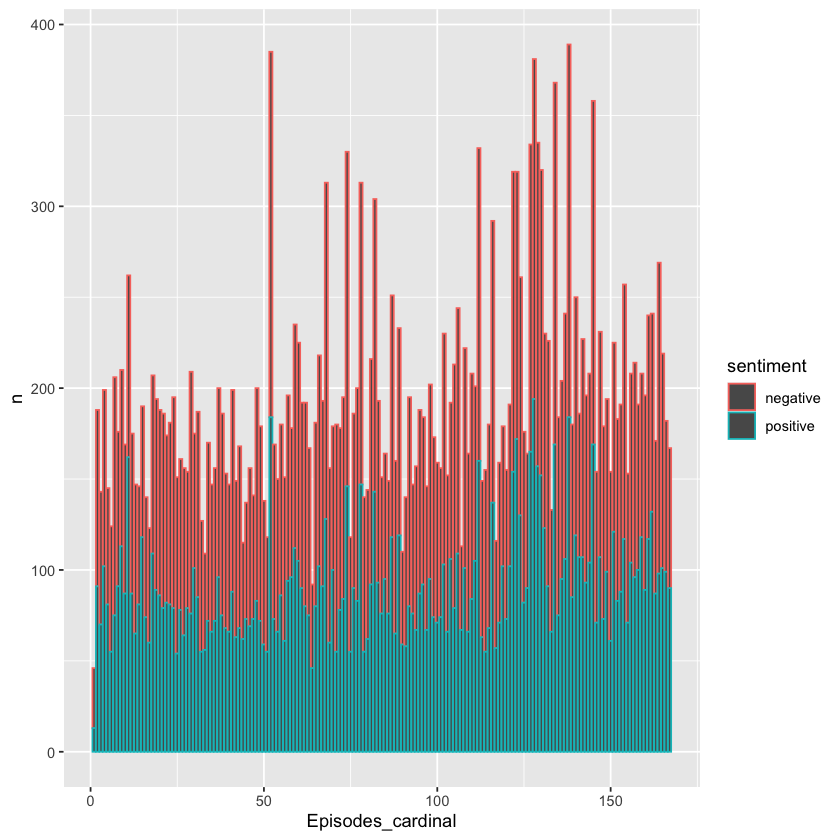

In [37]:
Emotion_Count %>%
filter(sentiment == "positive" | sentiment == "negative")%>%
    ggplot(aes(x=Episodes_cardinal, y=n, color=sentiment)) %>% + 
geom_col()

21. Graph for sentiment words:
        This Graph shows the number of Positive and Negative words in each episode.
        filter() function is to filter out words not from Positive and Negative types.
        %in% means 2 conditions having AND relationship.
        ggplot() function is to draw a graph, sentiment is used for color.
        geom_col() function will make a bar chart for me.
        facet_wrap function will separate the graph by sentiment, and display in 2 columns.
    
The trend is getting clear!

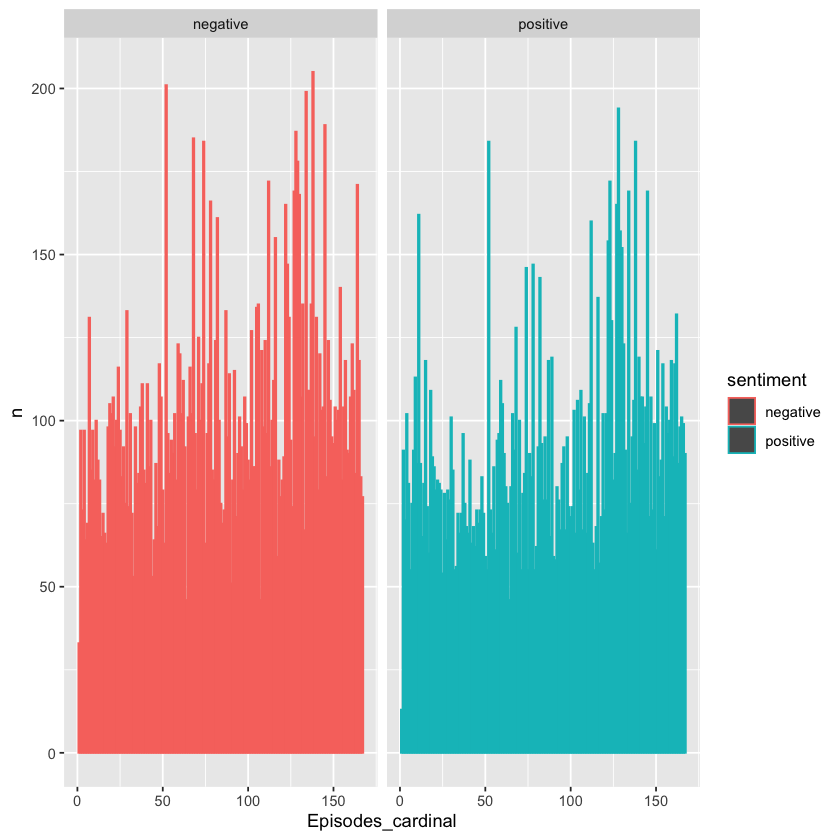

In [38]:
Emotion_Count %>%
filter(sentiment %in% c("positive","negative"))%>%
    ggplot(aes(x=Episodes_cardinal, y=n, color=sentiment)) %>% + 
geom_col()%>% +
facet_wrap(~sentiment, ncol=2)

22. Graph for emotional words:
        This Graph shows the number of 8 kinds of emotional words in each episode.
        filter() function is to filter out words not from 8 emotion types.
        ggplot() function is to draw a graph, sentiment is used for color.
    
But the trend is not very apparent!

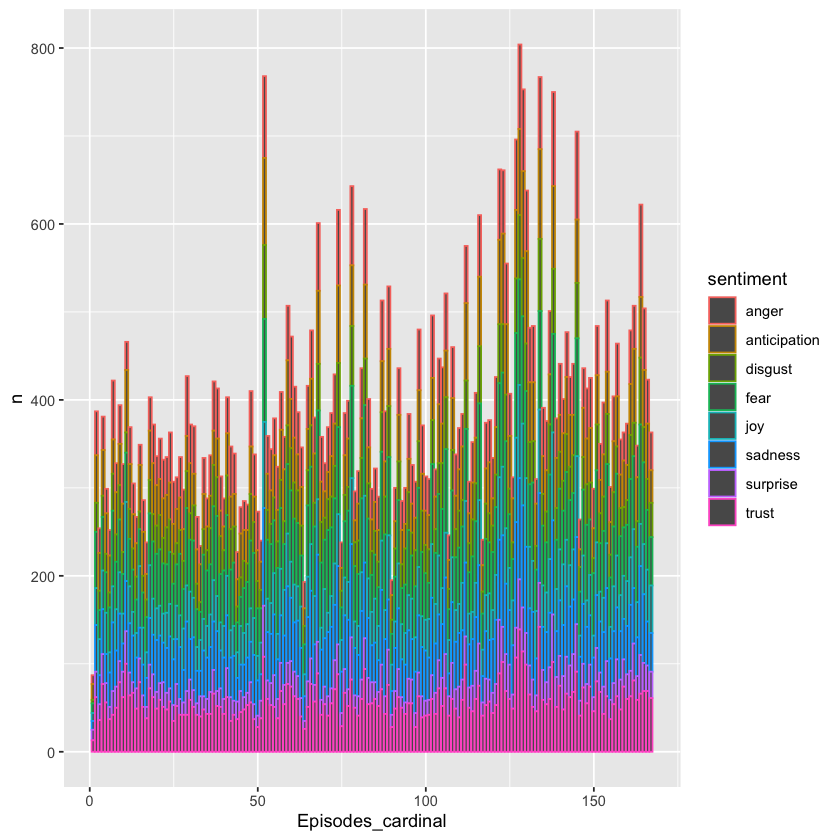

In [39]:
Emotion_Count %>%
filter(sentiment != "positive" & sentiment != "negative")%>%
    ggplot(aes(x=Episodes_cardinal, y=n, color=sentiment)) %>% + 
geom_col()

23. Graph for emotional words:
        This Graph shows the number of 8 kinds of emotional words in each episode.
        filter() function is to filter out words not from 8 emotion types.
        ggplot() function is to draw a graph, sentiment is used for color.
        geom_col() function will make a bar chart for me.
        facet_wrap function will separate the graph by sentiment, and display in 3 columns.
        
The trend is getting clear!

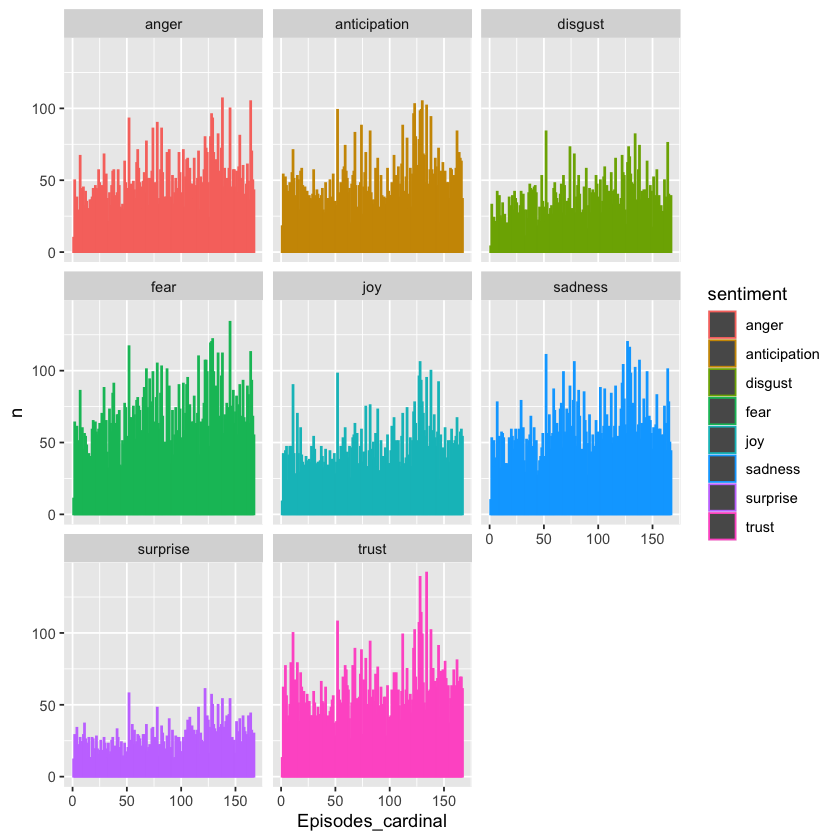

In [40]:
Emotion_Count %>%
filter(sentiment != "positive" & sentiment != "negative")%>%
    ggplot(aes(x=Episodes_cardinal, y=n, color=sentiment)) %>% + 
geom_col()%>% +
facet_wrap(~sentiment, ncol=3)

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

Answer for  task(e):

Web: The API I use is from GeoNet. And the Endpoint I am going to use is Quakes, which returns quakes possibly felt in the New Zealand region during the last 365 days up to a maximum of 100 quakes.

1. These libraries may be used later.

In [1]:
library(httr)
library(dplyr)
library(purrr)
library(jsonlite)
library(glue)
library(tidytext)
library(tidyverse)
library(rvest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ readr   1.3.1
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ glue::collapse()    masks dplyr::collapse()
✖ dplyr::filter()     masks stats::filter()
✖ jsonlite::flatten() masks purrr::flatten()
✖ dplyr::lag()        masks stats::lag()

Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


The following 

2. I create a sequence from 0 to 8, because MMI parameter in the url query is from -1 to 8. And -1 is used for quakes that are to small to calculate a stable MMI value for. So I will use MMI from 0 to 8, and exclude -1.

For this sequence, I create a dataframe named Page_df.

In [2]:
Page_df <- tibble(Page = seq(0,8))
Page_df

Page
<int>
0
1
2
3
4
5
6
7
8


3. Function get_link is designed to glue the url for all pages. 

In [3]:
get_link <- function(page){
    link <- glue("https://api.geonet.org.nz/quake?MMI={page}")
    return(link)
    }

get_link("1")

https://api.geonet.org.nz/quake?MMI=1

4. I call the function get_link, and add one more column for links, and the new dataframe's name is Pages_Links_df

In [4]:
Pages_Links_df <- Page_df %>%
    mutate(Links = Page %>%
          get_link)
Pages_Links_df

Page,Links
<int>,<glue>
0,https://api.geonet.org.nz/quake?MMI=0
1,https://api.geonet.org.nz/quake?MMI=1
2,https://api.geonet.org.nz/quake?MMI=2
3,https://api.geonet.org.nz/quake?MMI=3
4,https://api.geonet.org.nz/quake?MMI=4
5,https://api.geonet.org.nz/quake?MMI=5
6,https://api.geonet.org.nz/quake?MMI=6
7,https://api.geonet.org.nz/quake?MMI=7
8,https://api.geonet.org.nz/quake?MMI=8


5. Function get_info is designed for colloecting the wanted information from columns.

In [5]:
get_info <- function(column_numbe){
    vector = c()
    for (link in Pages_Links_df$Links){
        get_data = GET(link)
        get_content = jsonlite::fromJSON(content(get_data,"text"))
        column_info = purrr::pluck(get_content, "features","properties", column_numbe)
        vector <- c(vector,column_info)}
    return(vector)
    }

6. Call function get_info to get the cetain column contents.

In [6]:
public_IDs <- get_info(1)
times <- get_info(2)
depths <- get_info(3)
magnitudes <- get_info(4)

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting to UTF-8.

No encoding supplied: defaulting

7. Create a data frame for the collected data. 

In [7]:
Pages_Links_info_df <- tibble(public_IDs,
    times,
    depths,
    magnitudes)

Pages_Links_info_df %>%
sample_n(5)

public_IDs,times,depths,magnitudes
<chr>,<chr>,<dbl>,<dbl>
2020p747077,2020-10-03T10:02:51.688Z,27.444595,1.524037
2020p684790,2020-09-10T08:56:09.617Z,34.911205,3.766221
2020p746756,2020-10-03T07:11:38.201Z,18.428314,2.095433
2020p748496,2020-10-03T22:38:51.429Z,24.474445,1.555867
2020p663945,2020-09-02T15:50:01.435Z,8.438038,2.639877


8. Tidy up the 'times' column, in order to separate Dates and times.

In [8]:
Daily_info_df <- Pages_Links_info_df %>%
    separate(col = times,
            into = c("Date_chr","Times"),
            sep = "T")

Daily_info_df %>%
    sample_n(5)

public_IDs,Date_chr,Times,depths,magnitudes
<chr>,<chr>,<chr>,<dbl>,<dbl>
2020p746824,2020-10-03,07:47:25.546Z,392.116425,4.280766
2020p727190,2020-09-26,01:27:07.893Z,12.000000,3.163735
2020p747979,2020-10-03,18:03:24.412Z,102.583290,1.061217
2020p411985,2020-06-01,10:25:39.337Z,5.000000,3.401429
2020p746090,2020-10-03,01:16:58.834Z,6.973911,1.174973


9. Add one more column that changes Dates' class from chr to data, and select Date and depths columns.

In [11]:
Daily_info_df %<>%
    mutate(Dates = as.Date(Date_chr))

Daily_depths <- Daily_info_df[, c(6, 4)]

Daily_depths %>%
    sample_n(5)

Dates,depths
<date>,<dbl>
2020-09-23,23.25245
2020-10-04,5.00000
2020-10-04,5.00000
2020-06-19,12.00000
2020-05-24,36.52346


10. Filter the data recording information after 2020-04-01, as I am going to plot the period from Apr to Oct only.

In [12]:
Apr_Oct_depths <- Daily_depths %>%
    filter(Dates >= as.POSIXct("2020-04-01"))

Apr_Oct_depths %>%
    sample_n(5)

Dates,depths
<date>,<dbl>
2020-10-03,34.48658
2020-10-03,138.60902
2020-10-03,279.91071
2020-09-20,14.42714
2020-10-03,24.47445


11. group by date and summarize the mean for each date. 

In [13]:
Apr_Oct_mean_depths <- Apr_Oct_depths %>%
    group_by(Dates)%>%
    summarize(c = mean(depths))

Apr_Oct_mean_depths %>%
    sample_n(5)

`summarise()` ungrouping output (override with `.groups` argument)



Dates,c
<date>,<dbl>
2020-04-14,7.845854
2020-06-23,26.959681
2020-05-25,28.838961
2020-09-05,12.577360
2020-07-23,21.973545


12. plot x = date, y = average depths. And I also put the label on the graph.

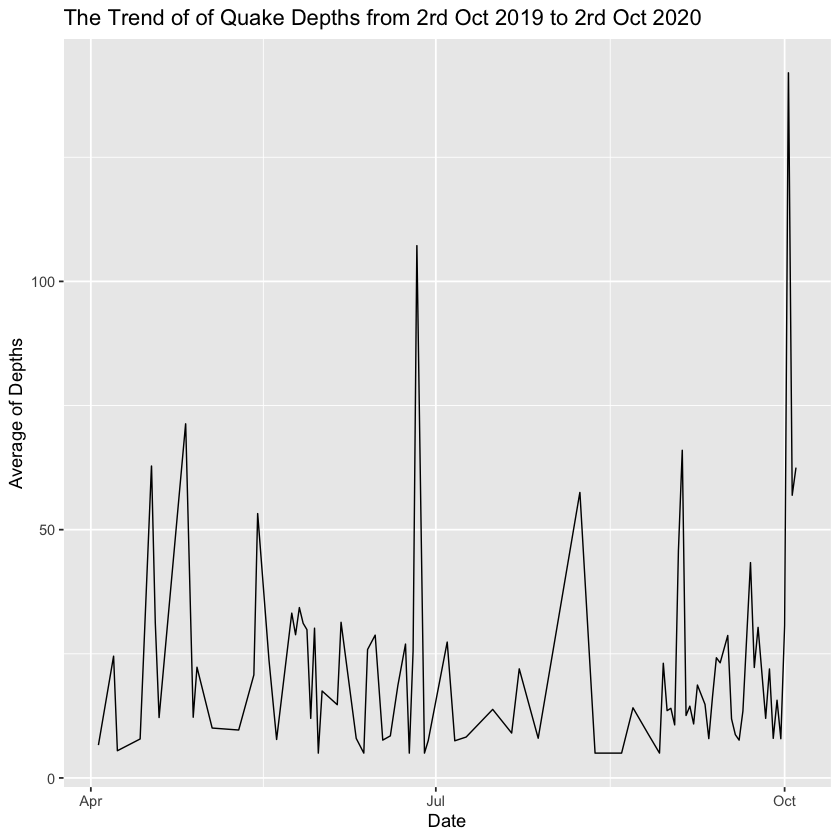

In [14]:
Apr_Oct_mean_depths %>%
    ggplot(mapping = aes(x = Dates,
                        y = c,
                        group = 1))+
    geom_line(size = 0.4)+
    labs(title = "The Trend of of Quake Depths from 2rd Oct 2019 to 2rd Oct 2020 ",
            x = "Date",
            y = "Average of Depths")

## Julia part (5 marks)

Reproduce (at least part) of the scraping workflow you have done in R using Julia.

**you will need to do this in a new, separated notebook or in JuliaBox**

_hint_ this is the moment to go back to the Julia notebooks from the lab.

-----The answer is on the another file. 